In [1]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [2]:
data = pd.read_csv('./datasets/Uganda_seasonal_normalized_mean.csv')
data['Is_drought'] = data.drought_reported>0
data.head()

,District,year,Season,EVI_mean,NDVI_mean,SoilMoisture00_10cm_mean,SoilMoisture100_200cm_mean,SoilMoisture10_40cm_mean,SoilMoisture40_100cm_mean,SoilTemperature00_10cm_mean,...,precipitation_per_hour_v2_mean,rainfall_mean,surface_temperature_daytime_mean,surface_temperature_nighttime_mean,wind_speed_mean,SPEI_3month_lag1,drought_reported,drought_news_article,drought_desinventar,Is_drought
0,ABIM,2000,11_12,0.635496,0.232554,0.876312,0.199678,0.736812,0.605763,-0.619369,...,-0.469460,1.336204,-0.151764,-1.343323,-0.412148,0.946693,0,0,0,False
1,ABIM,2001,11_12,-0.087761,-0.109488,0.493821,0.183495,0.532963,0.545170,-0.342333,...,-0.254581,0.823853,-0.334808,-0.132387,-1.004612,1.014671,0,0,0,False
2,ABIM,2002,11_12,-1.376630,-1.645360,-1.512378,-1.487177,-1.611315,-1.905963,1.363756,...,-1.405233,-0.482233,2.041320,0.780647,0.752253,0.714817,0,0,0,False
3,ABIM,2003,11_12,0.271856,0.277573,-0.653029,-0.338649,-0.424325,-0.103768,0.496371,...,-1.661421,-1.335585,0.161190,0.848854,1.321092,-1.517769,0,0,0,False
4,ABIM,2004,11_12,-0.947108,-1.454412,-1.207277,-0.974946,-0.705645,-0.739778,0.922325,...,-1.550847,-0.415216,0.949508,-0.042240,0.929712,0.386794,0,0,0,False


In [3]:
All_label_list = ['drought_reported', 'drought_news_article', 'drought_desinventar', 'Is_drought']

label_name = 'Is_drought'

All_feature_list = list(data.drop(labels=['District','year','Season']+All_label_list, 
                                  axis=1).columns)

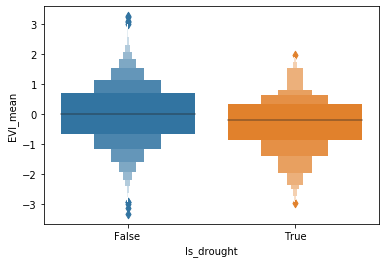

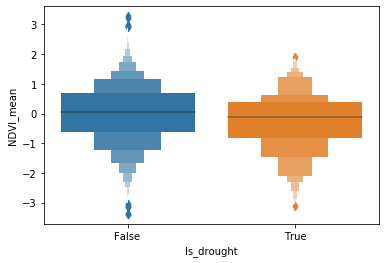

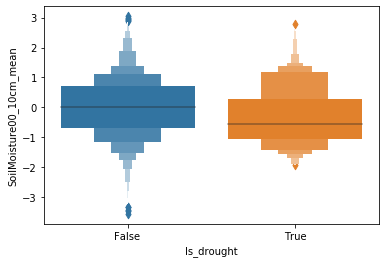

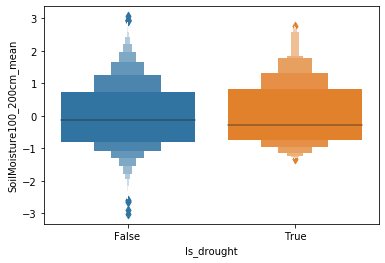

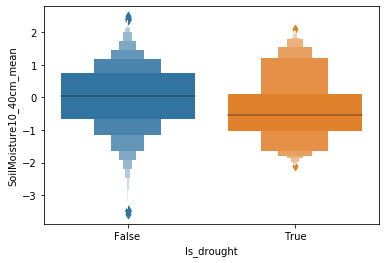

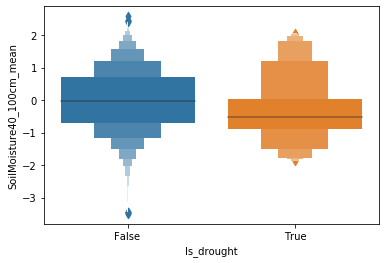

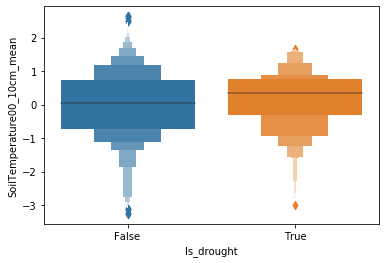

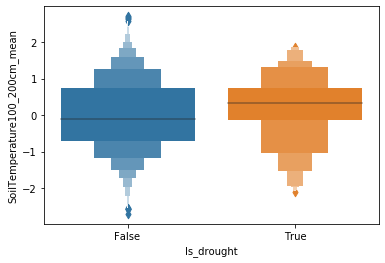

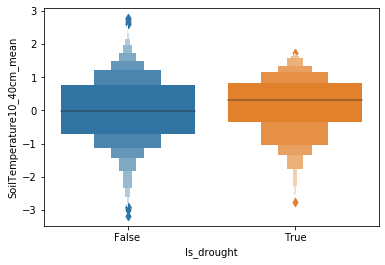

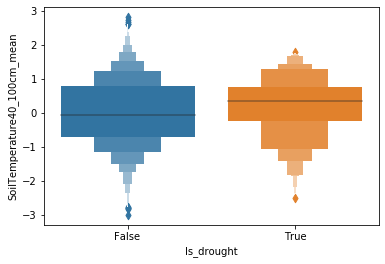

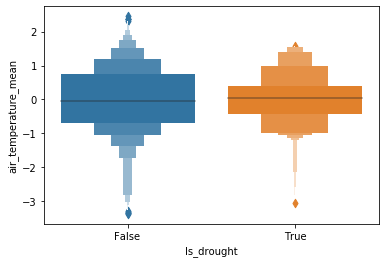

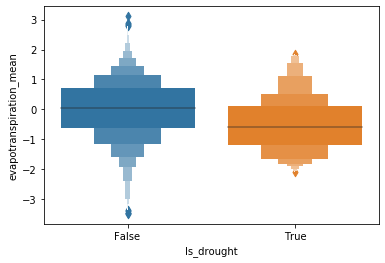

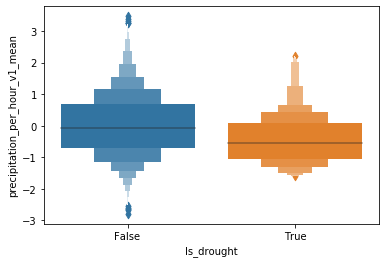

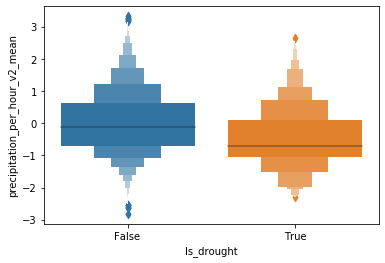

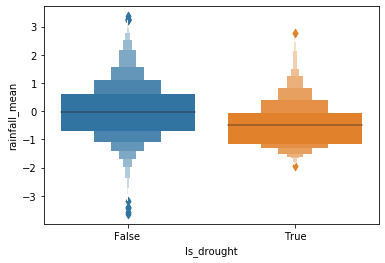

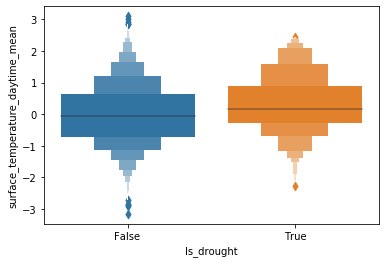

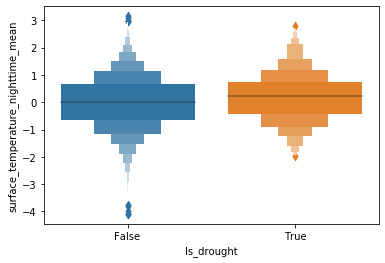

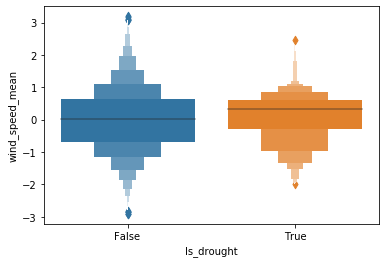

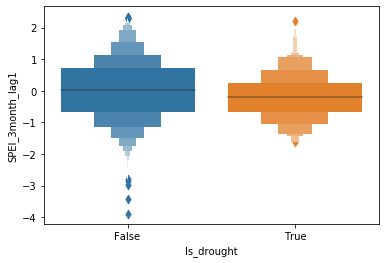

In [4]:
for col in All_feature_list:
    plt.figure()
    sns.boxenplot(x=label_name,y=col,data=data)
    

In [5]:
data.drop(labels='year',axis=1).groupby(label_name).median().T

Is_drought,False,True
EVI_mean,0.010342,-0.196214
NDVI_mean,0.066052,-0.127157
SoilMoisture00_10cm_mean,-0.004295,-0.570226
SoilMoisture100_200cm_mean,-0.116419,-0.292951
SoilMoisture10_40cm_mean,0.037127,-0.530722
SoilMoisture40_100cm_mean,-0.031783,-0.531513
SoilTemperature00_10cm_mean,0.038805,0.340174
SoilTemperature100_200cm_mean,-0.098989,0.320006
SoilTemperature10_40cm_mean,-0.015530,0.302455
SoilTemperature40_100cm_mean,-0.066914,0.361192


In [56]:
features_2_drop = ['EVI_mean','NDVI_mean','SoilMoisture40_100cm_mean','SoilMoisture100_200cm_mean',
                  'air_temperature_mean','evapotranspiration_mean','precipitation_per_hour_v1_mean',
                  'rainfall_mean','surface_temperature_nighttime_mean','wind_speed_mean',
                  'SoilTemperature40_100cm_mean','SoilTemperature100_200cm_mean']


labels_2_drop = ['drought_reported', 'drought_news_article', 'drought_desinventar']

selected_data = data.drop(labels=features_2_drop+labels_2_drop,axis=1).copy()

print(selected_data.shape)

selected_features = list(set(selected_data.columns).intersection(All_feature_list))

selected_features.sort()

selected_data.head()



(4880, 11)


,District,year,Season,SoilMoisture00_10cm_mean,SoilMoisture10_40cm_mean,SoilTemperature00_10cm_mean,SoilTemperature10_40cm_mean,precipitation_per_hour_v2_mean,surface_temperature_daytime_mean,SPEI_3month_lag1,Is_drought
0,ABIM,2000,11_12,0.876312,0.736812,-0.619369,-0.602974,-0.469460,-0.151764,0.946693,False
1,ABIM,2001,11_12,0.493821,0.532963,-0.342333,-0.423521,-0.254581,-0.334808,1.014671,False
2,ABIM,2002,11_12,-1.512378,-1.611315,1.363756,1.624961,-1.405233,2.041320,0.714817,False
3,ABIM,2003,11_12,-0.653029,-0.424325,0.496371,0.313736,-1.661421,0.161190,-1.517769,False
4,ABIM,2004,11_12,-1.207277,-0.705645,0.922325,0.870335,-1.550847,0.949508,0.386794,False


In [7]:
selected_data[label_name].sum()

65

In [46]:
reduced_data = pd.DataFrame()

for name,group in selected_data.groupby('District'):
    drought_years = np.array(group[group[label_name]]['year'])
    keep_years = np.sort(np.unique(np.append(drought_years, [drought_years-1, drought_years+1])))
    temp = group[group.year.apply(lambda x: x in keep_years)].sort_values(by=['year', 'Season']).copy()
    reduced_data = pd.concat([reduced_data, temp])

reduced_data.reset_index(drop=True,inplace=True)

reduced_data

,District,year,Season,SoilMoisture00_10cm_mean,SoilMoisture10_40cm_mean,SoilTemperature00_10cm_mean,SoilTemperature10_40cm_mean,precipitation_per_hour_v2_mean,surface_temperature_daytime_mean,SPEI_3month_lag1,Is_drought
0,ABIM,2008,11_12,-0.299935,-0.513232,0.023236,-0.000761,0.410969,-0.863988,-0.956344,False
1,ABIM,2008,6_7,-1.087030,-1.219722,0.439307,0.199290,-1.185724,0.536434,-1.891516,False
2,ABIM,2009,11_12,-1.828673,-2.402835,1.557044,1.822465,-0.086266,0.695129,-0.076895,False
3,ABIM,2009,6_7,-0.739839,-0.530722,0.340174,0.370177,-1.107978,-0.054718,-0.231664,True
4,ABIM,2010,11_12,0.371432,0.039433,-0.270119,-0.319993,-0.157900,-0.416993,-0.565711,False
...,...,...,...,...,...,...,...,...,...,...,...
361,ZOMBO,2008,6_7,-1.859536,-2.015221,0.628148,0.381513,-0.255114,-0.593314,-1.785325,False
362,ZOMBO,2009,11_12,-3.065165,-3.099320,1.730749,1.862955,0.490798,1.026036,-1.801010,False
363,ZOMBO,2009,6_7,-1.599447,-1.664688,0.569586,0.620848,-1.583708,0.581066,-1.037791,True
364,ZOMBO,2010,11_12,0.280299,0.266445,-0.131787,-0.019997,-0.062517,1.113469,0.534852,False


In [57]:
selected_features

['SPEI_3month_lag1',
 'SoilMoisture00_10cm_mean',
 'SoilMoisture10_40cm_mean',
 'SoilTemperature00_10cm_mean',
 'SoilTemperature10_40cm_mean',
 'precipitation_per_hour_v2_mean',
 'surface_temperature_daytime_mean']

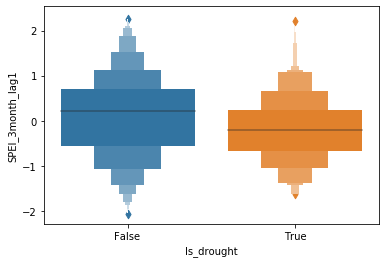

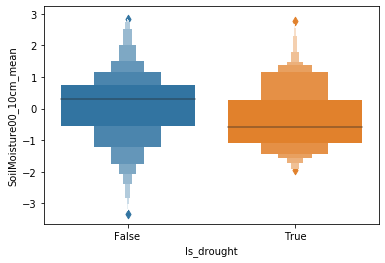

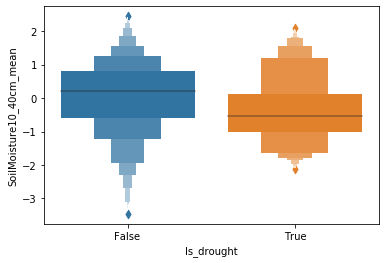

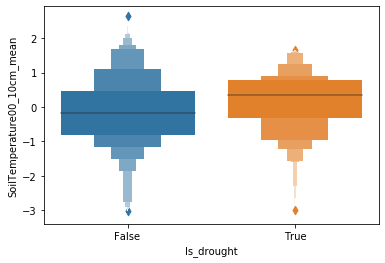

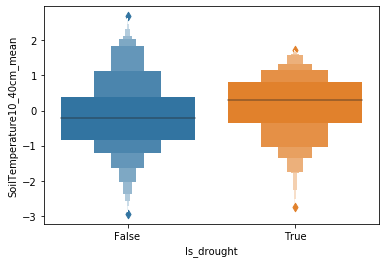

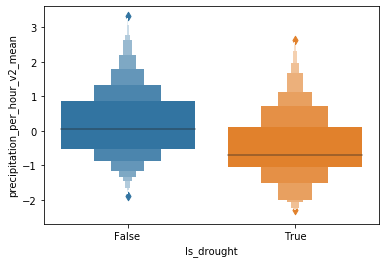

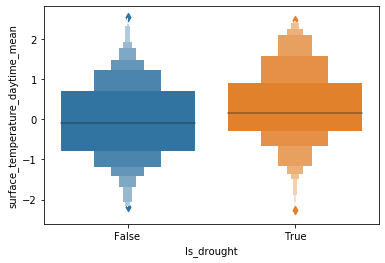

In [60]:
for col in selected_features:
    plt.figure()
    sns.boxenplot(x=label_name,y=col,data=reduced_data)
    